# 1) CBP Monthly Encounters: Ingestion, Cleaning, and Graphing

Data taken from the Office of Homeland Security Statistics (OHSS)'s [CBP Encounters](https://ohss.dhs.gov/khsm/cbp-encounters) page on September 30, 2025 (file "CBP Encounters - USBP - November 2024").

Note that dates in this file use a fiscal year. The federal fiscal year runs October 1 through September 30. This means that October 1, 2024 (which is in this dataset) appears as year `FY2025` and month `01 October` (i.e. the first month of FY2025).

This workbook shows how to ingest the "Monthly Region" sheet from the Excel file, clean, and graph it. 

In [3]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.io as pio

# Don't want to duplicate the variable here, and this seems to be the prefered way to import something
# when you're not dealing with a "proper" package (which notebooks are not)
import sys

sys.path.append("..")
from backend import colorblind_palette

# Allows plotly plots to render interactively locally, but as static images when viewed in github.
# Without this the plotly images simply do not render in github.
pio.renderers.default = "vscode+png"

# Read in data and rename columns for convenience.
df = pd.read_excel("KHSM Encounters (USBP) fy25m11.xlsx", sheet_name="Monthly Region")
df = df.rename(columns={"Fiscal\nYear": "Fiscal_Year"})
df.columns = df.columns.str.lower()
df.head()

,fiscal_year,month,region,quantity
0,2000,01 October,Coastal Border,740
1,2000,01 October,Northern Land Border,1250
2,2000,01 October,Southwest Land Border,87820
3,2000,02 November,Coastal Border,500
4,2000,02 November,Northern Land Border,960


In [4]:
# Create a FiscalDate column that is a datetime object that is a combination of the FiscalYear and Month columns.
df.month = df.month.str.split().str[1]  # Convert "01 October" to just "October"
df["fiscal_date"] = df.fiscal_year.astype(str) + " " + df.month
df.fiscal_date = pd.to_datetime(df.fiscal_date, format="%Y %B")  # Day defaults to 1

df.head()

,fiscal_year,month,region,quantity,fiscal_date
0,2000,October,Coastal Border,740,2000-10-01
1,2000,October,Northern Land Border,1250,2000-10-01
2,2000,October,Southwest Land Border,87820,2000-10-01
3,2000,November,Coastal Border,500,2000-11-01
4,2000,November,Northern Land Border,960,2000-11-01


In [5]:
# Create a Date column that is the calendar date. This means that months >= October
# need to have 1 subtracted from the year
def convert_fiscal_date_to_calendar_date(fiscal_date):
    if fiscal_date.month >= 10:
        return datetime(fiscal_date.year - 1, fiscal_date.month, fiscal_date.day)
    else:
        return fiscal_date


df["date"] = df.fiscal_date.apply(convert_fiscal_date_to_calendar_date)
df.head()

,fiscal_year,month,region,quantity,fiscal_date,date
0,2000,October,Coastal Border,740,2000-10-01,1999-10-01
1,2000,October,Northern Land Border,1250,2000-10-01,1999-10-01
2,2000,October,Southwest Land Border,87820,2000-10-01,1999-10-01
3,2000,November,Coastal Border,500,2000-11-01,1999-11-01
4,2000,November,Northern Land Border,960,2000-11-01,1999-11-01


In [6]:
# Now subset columns
df = df[["date", "region", "quantity"]]
df.head()

,date,region,quantity
0,1999-10-01,Coastal Border,740
1,1999-10-01,Northern Land Border,1250
2,1999-10-01,Southwest Land Border,87820
3,1999-11-01,Coastal Border,500
4,1999-11-01,Northern Land Border,960


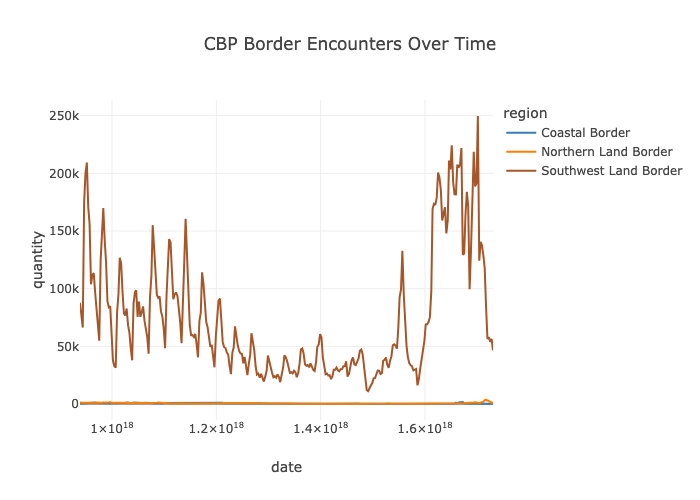

In [7]:
# Finally, graph
px.line(
    df,
    x="date",
    y="quantity",
    color="region",
    title="CBP Border Encounters Over Time",
    color_discrete_sequence=colorblind_palette,
)

## Addition to cpb_functions.py

The above code is wrapped in the function `get_monthly_region_df` in the module `cbp_functions`. Note that it takes an optional `output_format` parameter, so you can get the data in long or wide format.

In [8]:
from cbp_functions import get_monthly_region_df

df2 = get_monthly_region_df()
df2.head()

,date,region,quantity
0,1999-10-01,Coastal Border,740
1,1999-10-01,Northern Land Border,1250
2,1999-10-01,Southwest Land Border,87820
3,1999-11-01,Coastal Border,500
4,1999-11-01,Northern Land Border,960


In [9]:
df.equals(df2)

True